<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       200000 non-null  complex64
dtypes: complex64(1)
memory usage: 1.5 MB
None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       200000 non-null  complex64
dtypes: complex64(1)
memory usage: 1.5 MB
None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   0       200000 non-null  complex64
dtypes: complex64(1)
memory usage: 1.5 MB
None



Concatenação efetuada
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 4 columns):
 #   Column   Non-Null Count

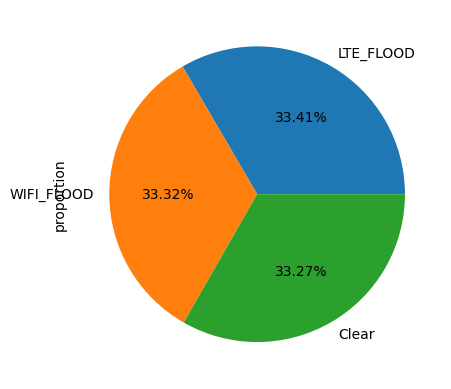
















              precision    recall  f1-score   support

       Clear       0.52      0.44      0.48     54903
   LTE_FLOOD       0.59      0.30      0.40     55127
  WIFI_FLOOD       0.61      1.00      0.76     54970

    accuracy                           0.58    165000
   macro avg       0.57      0.58      0.54    165000
weighted avg       0.57      0.58      0.54    165000



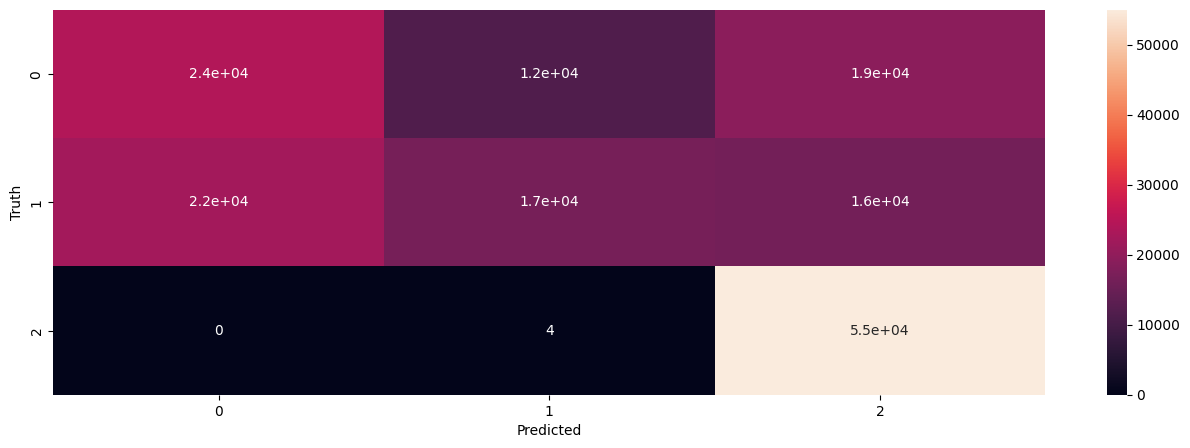

In [5]:
import pandas as pd
import numpy as np
import warnings 
from Library.TrainTestSplit import TrainTestSplit 
from Library.sinais import signal, concat_3
from Library.Plots_model import Visualization
from sklearn.neighbors import KNeighborsClassifier
from Library.Normalizing import Normalizing
from Library.Plots_model import Visualization ,RandomizedSearchCVWrapper
from Library.metrics import metrics


warnings.filterwarnings('ignore')

Clear = np.load("D:/Python/AICT/Data_/Clear.npy")
WIFI_FLOOD = np.load("D:/Python/AICT/Data_/WIFI_FLOOD.npy")
LTE_FLOOD = np.load("D:/Python/AICT/Data_/LTE_FLOOD.bin.npy")
WIFI_300PING = np.load("D:/Python/AICT/Data_/WIFI_PING300.npy")
LTE_300PING = np.load("D:/Python/AICT/Data_/LTE_PING300.npy")



Wifi = (signal(data=WIFI_FLOOD,slice = 200000, sinal = 'WIFI_FLOOD',id = 'WIFI_FLOOD'))
Wifi.info()
Wifi.to_pandas()


CLEAR = (signal(data=Clear,slice = 200000, sinal = 'Clear', id = 'Clear'))
CLEAR.info()
CLEAR.to_pandas()

print("\n\n")

LTE = (signal(data=LTE_FLOOD,slice = 200000, sinal = 'LTE_FLOOD', id='LTE_FLOOD'))
LTE.info()
LTE.to_pandas()

print("\n\n")


uniao = concat_3(database1= CLEAR.database, database2=Wifi.database,database3=LTE.database ,sinal1 ='Clear',sinal2 = 'WIFI_FLOOD',sinal3 = 'LTE_FLOOD')
uniao.merge()
uniao.concat = uniao.concat.reset_index().rename(columns={'level_0':'Signals','level_1':'index'}).drop(columns=['index'])
df = uniao.concat
df.info()

print("\n\n")


spliter = TrainTestSplit(data = df)
# Acessando os conjuntos de treinamento e teste
X_train, X_test, y_train, y_test =spliter.train_test_split( test_size=0.275, random_state=210)

print("\n\n")
# Criando um objeto Visualization

vis = Visualization()

# Plotando o gráfico de pizza
vis.plot_pie(y_test) # Distruição de X_train


print("\n\n")

normalized = Normalizing(X_train=X_train, X_test= X_test)


knn = KNeighborsClassifier(n_neighbors= 9,weights='distance', p=2)
knn_fit = knn.fit(normalized.X_train ,y_train)
model = knn_fit
print("\n\n")


metrics = metrics(model = model,
X_train =normalized.X_train,X_test = normalized.X_test, y_train=y_train ,y_test=y_test)

metrics.table()
print("\n\n")


confusion = Visualization()
confusion_matrix = confusion.confusion_matrix(model=model,X_train =normalized.X_train,
X_test= normalized.X_test, y_train= y_train, y_test= y_test)

print("\n\n")
metrics.confusion_matrix()
print("\n\n")
metrics.report()